In [1]:
import numpy as np
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [2]:
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [4]:
mapActivity={'STANDING':4,'SITTING':3,'LAYING':5,'WALKING':0,'WALKING_DOWNSTAIRS':2,'WALKING_UPSTAIRS':1}
train['Target']=train['Activity'].map(mapActivity)
test['Target']=test['Activity'].map(mapActivity)

In [5]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'Target'], axis=1)
y_train = train['Target']

In [6]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'Target'], axis=1)
y_test = test['Target']

In [7]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [9]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [15]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))

In [32]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes=labels,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(16,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# to suppress scientifiv notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [40]:
from tqdm import tqdm
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "Logistic",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("Logistic", LogisticRegression(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)

models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)





results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in tqdm(models):
    scoring = "accuracy"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

 20%|████████████████▊                                                                   | 1/5 [00:31<02:04, 31.25s/it]

Logistic: 98.35419470303417


 40%|█████████████████████████████████▌                                                  | 2/5 [01:26<02:16, 45.52s/it]

DTREE: 93.85180149558124


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [13:48<12:06, 363.23s/it]

XGB: 99.06148346490194


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [19:05<05:45, 345.22s/it]

Bagging: 96.25951155445182


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [21:10<00:00, 254.10s/it]

RF: 97.97339955696758


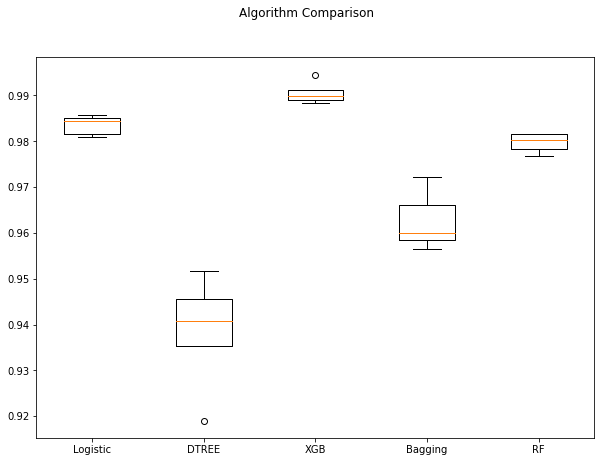

In [41]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## GridSearchCV(Logistic Regression)

In [42]:

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid.fit(X_train,y_train)
print("Best parameters are {} with CV score={}:" .format(log_reg_grid.best_params_,log_reg_grid.best_score_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters are {'C': 1, 'penalty': 'l2'} with CV score=0.9374335617559958:


Accuracy on training set :  0.9908868335146899
Accuracy on test set :  0.9572446555819477


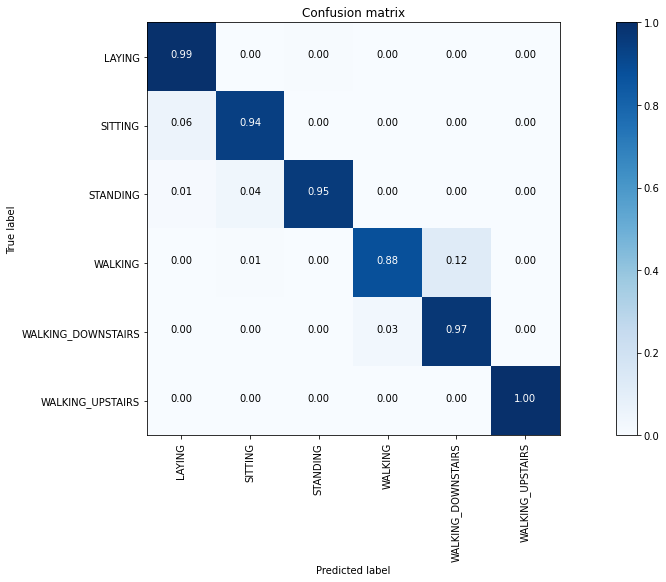

In [43]:
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,y_train)
get_metrics_score(lr,X_train,X_test,y_train,y_test)
y_pred=lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,labels)

## RandomizedSearchCV(Decision Tree)

In [61]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_impurity_decrease': 0.01, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__max_depth': 12} with CV score=0.854601016477291:
Wall time: 11min 52s


In [62]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=12,
        max_leaf_nodes=10,
        random_state=1,
        min_impurity_decrease=0.01,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=12, max_leaf_nodes=10,
                                        min_impurity_decrease=0.01,
                                        random_state=1))])

Accuracy on training set :  0.9092763873775843
Accuracy on test set :  0.838479809976247


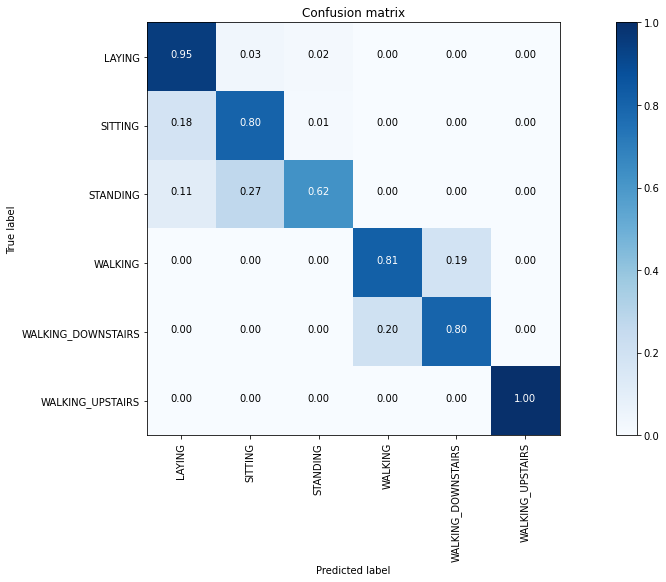

In [63]:
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)
y_pred=dtree_tuned1.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,labels)

## RandomizedSearchCV(RandomForestClassifier)

In [69]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__max_samples': 0.4000000000000001, 'randomforestclassifier__max_features': 'log2'} with CV score=0.9268283411257092:
Wall time: 27min 15s


In [70]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=250,
        max_features='log2',
        random_state=1,
        max_samples=0.4000000000000001,
        min_samples_leaf=3
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='log2',
                                        max_samples=0.4000000000000001,
                                        min_samples_leaf=3, n_estimators=250,
                                        random_state=1))])

Accuracy on training set :  0.9951033732317737
Accuracy on test set :  0.9307770614183916


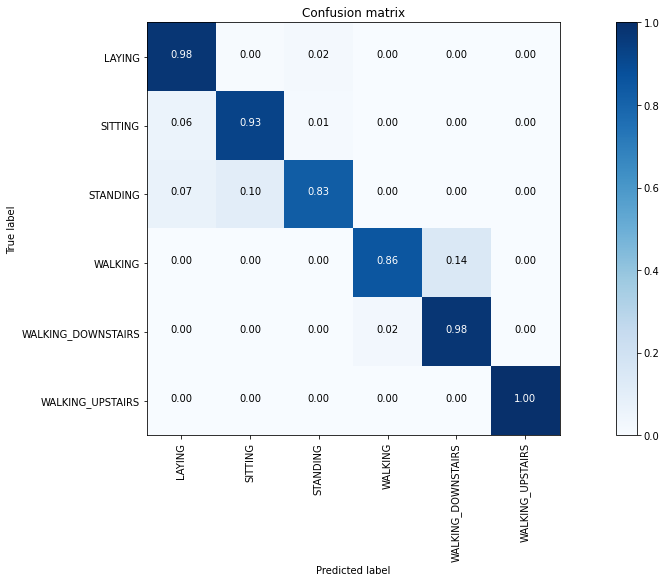

In [71]:
get_metrics_score(rf_tuned2,X_train,X_test,y_train,y_test)
y_pred=rf_tuned2.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,labels)

## Linear SVC with GridSearch

In [78]:
%%time
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1,cv=3)
lr_svc_grid.fit(X_train,y_train) 
print("Best parameters are {} with CV score={}:" .format(lr_svc_grid.best_params_,lr_svc_grid.best_score_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters are {'C': 0.5} with CV score=0.946139657005193:
Wall time: 1min 28s


Accuracy on training set :  0.9944232861806311
Accuracy on test set :  0.9674244994910078


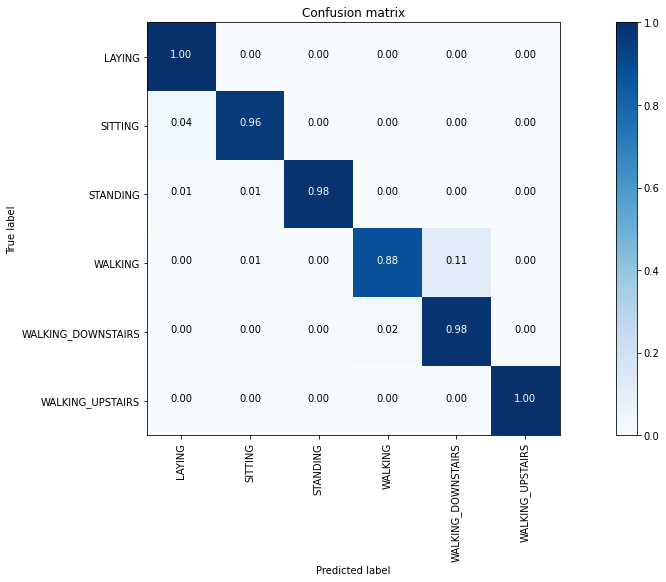

In [79]:
model=LinearSVC(C=0.5)
model.fit(X_train,y_train)
get_metrics_score(model,X_train,X_test,y_train,y_test)
y_pred=model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,labels)

## Kernel SVM with GridSearch

In [74]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1,cv=3)
rbf_svm_grid.fit(X_train,y_train)
print("Best parameters are {} with CV score={}:" .format(rbf_svm_grid.best_params_,rbf_svm_grid.best_score_))

Best parameters are {'C': 16, 'gamma': 0.0078125} with CV score=0.9440986186396224:


Accuracy on training set :  0.9964635473340587
Accuracy on test set :  0.9626739056667798


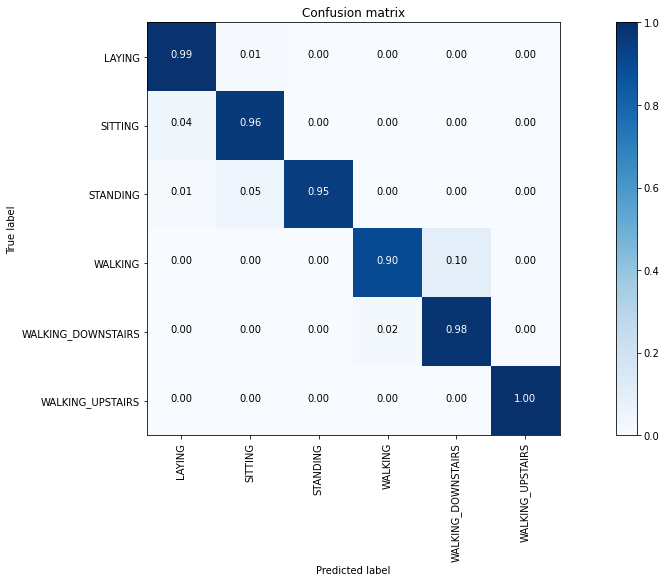

In [75]:
model=SVC(kernel='rbf',C=16,gamma=0.0078125)
model.fit(X_train,y_train)
get_metrics_score(model,X_train,X_test,y_train,y_test)
y_pred=model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,labels)

In [80]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Train Accuracy", "Test Accuracy"]
x.add_row(['Logistic Regression',0.99088,0.95724])
x.add_row(['Decision Tree',0.90927,0.83847])
x.add_row(['Random Forest',0.99510,0.93077])
x.add_row(['Linear SVC',0.99442,0.96742])
x.add_row(['Kernel SVC',0.99646,0.96267])

In [81]:
print(x)

+---------------------+----------------+---------------+
|        Model        | Train Accuracy | Test Accuracy |
+---------------------+----------------+---------------+
| Logistic Regression |    0.99088     |    0.95724    |
|    Decision Tree    |    0.90927     |    0.83847    |
|    Random Forest    |     0.9951     |    0.93077    |
|      Linear SVC     |    0.99442     |    0.96742    |
|      Kernel SVC     |    0.99646     |    0.96267    |
+---------------------+----------------+---------------+
